
___
Team Member Names
- Name 1: Matthew D. Cusack
- Name 2: Tim Cabaza
- Name 3: Amy Adyanthaya

<a id="top"></a>
________
# Clustering
____

## Contents
* <a href="#Imports">Dependency and Data Imports</a>
* <a href="#DataPrep">Data Preparation</a>
* <a href="#BusinessUnderstanding">Business Understanding</a>
* <a href="#DataUnderstanding1">Data Understanding 1</a>
* <a href="#DataUnderstanding2">Data Understanding 2</a> 
* <a href="#ModelEval1">Modeling and Evaluation 1</a>
* <a href="#ModelEval2">Modeling and Evaluation 2</a>
* <a href="#ModelEval3">Modeling and Evaluation 3</a>
* <a href="#ModelEval4">Modeling and Evaluation 4</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
_______

___
___
<a href="#top">Back to Top</a>
<a id="Imports"></a>
## Imports

In [1]:
#1 

# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler

# for option A: Clustering methods
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# for option B: association rule mining
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# for option C:
# import graphlab as gl

from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
# import skfuzzy as fuzz ## Not finding the package
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
import itertools
from scipy.cluster.hierarchy import fcluster
from yellowbrick.cluster import KElbowVisualizer




In [2]:
#2 

# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


___
___
<a href="#top">Back to Top</a>
<a id="DataPrep"></a>
## Data Preperation
To Do:

    Remove Outliers
    Scale Data
    Remove non-independent variables

In [3]:
#3

# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string and not helpful
df1 = df1.drop('date', axis=1) # datetime change didn't work.
df1 = df1.drop('log_shares', axis=1) # not as useful

# Factor columns that need it for certain models
# Factor the `news_category` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['news_category'], drop_first=False)

# Factor the `day_of_week` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['day_of_week'], drop_first=False)

# drop Na's
df1.dropna()

df1.head()
print(df1.isnull().sum())

timedelta                0
n_tokens_title           0
n_unique_tokens          0
average_token_length     0
num_keywords             0
                        ..
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
Length: 61, dtype: int64


In [36]:
# i thought this looked more interesting - we can revert back by deleting this entire cell 

# df1.columns 
# # df1 = df1[['log_n_tokens_content', 'log_self_reference_avg_shares']]
# # df.head()
# # Get the column names to move
# cols_to_move = ['day_of_week', 'shares']

# # Select the columns to keep
# remaining_cols = [col for col in df.columns if col not in cols_to_move]

# # Move the columns to the beginning
# df = df[cols_to_move + remaining_cols]
# df.head()

,day_of_week,shares,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,Monday,593,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,Monday,1300,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,Monday,1100,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,Monday,1600,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,Monday,2400,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


In [4]:
#4

# Scale the features using standard scalar.
scaler = StandardScaler()

df1_std = scaler.fit_transform(df1)
# print(df1_std)

___

___
___
<a href="#top">Back to Top</a>
<a id="BusinessUnderstanding"></a>
## Business Understanding 1 (10 points).
Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). 

    The 'Online News Popularity' data were collected by Mashable.com, a digital media company that publishes articles on a variety of subjects, ranging from technology to world news. Mashable provides coverage on the latest trends and developments, along with entertaining articles covering lifestyle and pop culture. The data were collected by Mashable in 2013 to better understand their readers' preferences with the aim of altering or adjusting their content to create more popular articles. The more popular an article (measured by shares), the more ad revenue and web traffic is generated for Mashable. 

----  
How will you measure the effectiveness of a good algorithm? 

    A good algorithm will generate valuable insights into what drives a popular article, as well as web traffic to Mashable.com. The greater the number of shares and web traffic, the more ad revenue can be generated for Mashable. By implementing a good algorithm, Mashable will be able to adjust its content to better suit its readers' preferences and increase revenue.
 
----
Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

    {NEED TO UPDATE} Our chosen validation method makes sense for this dataset and the stakeholders involved ... {NEED TO UPDATE} 

    Silhouette Coefficient was the chosen method to score all clustering model algorithms, for Gaussian Mixture Model (GMM) we did explore the BIC score. 

    KMEANS++, Fuzzy C-means (FCM), Hierarchal Clustering, Agglomerative are not directly applicable to BIC. 
    BIC is not typically used with DBSCAN as BIC is designed for probabilistic models. 
    GMM: Both BIC and Silhouette scoring are valid methods. GMM is based on a probabilistic model. 


____
___
<a href="#top">Back to Top</a>
<a id="DataUnderstanding1"></a>
## Data Understanding 1 (10 points total)

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 

In [ ]:
df.info()

##### Original (before any cleaning):
url:        
    Containes the url of the article with the date      
    Object

timedelta:               
    Days between the article publication and the dataset acquisition (non-predictive)               
    float64

n_tokens_title:               
    Number of words in the title               
    float64

n_tokens_content:               
    Number of words in the content               
    float64

n_unique_tokens:               
    Rate of unique words in the content               
    float64

n_non_stop_words:           
    Rate of non-stop words in the content           
    float64

n_non_stop_unique_tokens:      
    Rate of unique non-stop words in the content      
    float64

num_hrefs:                    
    Number of links                 
    float64

num_self_hrefs:               
    Number of links to other articles published by Mashable            
    float64

num_imgs:                      
    Number of images        
    float64

num_videos:                    
    Number of videos            
    float64
    
average_token_length:               
    Average length of the words in the content               
    Float64

num_keywords:               
    Number of keywords in the metadata               
    float64

data_channel_is_lifestyle:     
    Is data channel 'Lifestyle'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_entertainment:          
    Is data channel 'Entertainment'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_bus:           
    Is data channel 'Business'?         
    Binary (Yes = 1 / No = 0)       
    float64
  
data_channel_is_socmed:        
    Is data channel 'Social Media'?             
    Binary (Yes = 1 / No = 0)       
    float64
   
data_channel_is_tech:          
    Is data channel 'Tech'?             
    Binary (Yes = 1 / No = 0)       
    float64
 
data_channel_is_world:         
    Is data channel 'World'?        
    Binary (Yes = 1 / No = 0)       
    float64
 
kw_min_min:               
    Worst keyword (min. shares)               
    float64

kw_max_min:                    
    Worst keyword (max. shares)         
    float64

kw_avg_min:                    
    Worst keyword (avg. shares)               
    float64

kw_min_max:                    
    Best keyword (min. shares)          
    float64

kw_max_max:                    
    Best keyword (max. shares)               
    float64

kw_avg_max:                    
    Best keyword (avg. shares)               
    float64

kw_min_avg:                    
    Avg. keyword (min. shares)               
    float64

kw_max_avg:                    
    Avg. keyword (max. shares)               
    float64

kw_avg_avg:                    
    Avg. keyword (avg. shares)          
    float64

self_reference_min_shares:    
    Min. shares of referenced articles in Mashable          
    float64

self_reference_max_shares:     
    Max. shares of referenced articles in Mashable          
    float64

self_reference_avg_sharess:   
    Avg. shares of referenced articles in Mashable          
    float64

weekday_is_monday:             
    Was the article published on a Monday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_tuesday:            
    Was the article published on a Tuesday?             
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_wednesday:          
    Was the article published on a Wednesday?               
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_thursday:           
    Was the article published on a Thursday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_friday:             
    Was the article published on a Friday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_saturday:           
    Was the article published on a Saturday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_sunday:              
    Was the article published on a Sunday?          
    Binary (Yes = 1 / No = 0)       
    float64

is_weekend:                    
    Was the article published on the weekend?               
    Binary (Yes = 1 / No = 0)       
    float64

LDA_00:                        
    LDA topic modeling 
    Closeness to LDA topic 0               
    float64

LDA_01:                       
    Closeness to LDA topic 1               
    float64

LDA_02:                        
    Closeness to LDA topic 2               
    float64

LDA_03:                       
    Closeness to LDA topic 3               
    float64

LDA_04:                        
    Closeness to LDA topic 4               
    float64

global_subjectivity:           
    Text subjectivity               
    float64

global_sentiment_polarity:     
    Text sentiment polarity               
    float64

global_rate_positive_words:    
    Rate of positive words in the content               
    float64

global_rate_negative_words:    
    Rate of negative words in the content               
    float64

rate_positive_words:           
    Rate of positive words among non-neutral tokens               
    float64

rate_negative_words:           
    Rate of negative words among non-neutral tokens               
    float64

avg_positive_polarity:         
    Avg. polarity of positive words               
    float64

min_positive_polarity:         
    Min. polarity of positive words               
    float64

max_positive_polarity:         
    Max. polarity of positive words               
    float64

avg_negative_polarity:         
    Avg. polarity of negative  words               
    float64

min_negative_polarity:         
    Min. polarity of negative  words               
    float64

max_negative_polarity:         
    Max. polarity of negative  words               
    float64

title_subjectivity:            
    Title subjectivity               
    float64

title_sentiment_polarity:      
    Title polarity               
    float64

abs_title_subjectivity:        
    Absolute subjectivity level               
    float64

abs_title_sentiment_polarity:  
    Absolute polarity level               
    float64

shares:                        
    Number of shares (target)               
    Integer

##### Newly Created (after previously cleaning & transformations):
url_name:               
    URL of the article (non-predictive)               
    Float

Date:               
    The date the article was published               
    DateTime

Day_of_week:               
    What day of the week the article is posted on               
    Categorical

news_category:               
    What news category the article is               
    Categorical

Year:               
    The year the article was published               
    Integer

Month:               
    The month the aticle was published               
    Integer

log_shares:               
    log of the "shares" variable               
    Float

log_n_tokens_content:               
    log of the "n_tokens_content" variable               
    Float

log_num_hrefs:               
    log of the "num_hrefs" variable               
    Float

log_num_self_hrefs:               
    log of the "num_self_hrefs" variable               
    Float

log_num_imgs:               
    log of the "num_imgs" variable               
    Float

log_num_videos:               
    log of the "num_videos" variable               
    Float

log_kw_max_min:               
    log of the "kw_max_min" variable               
    Float

log_kw_min_max:               
    log of the "kw_min_max" variable               
    Float

log_kw_avg_avg:               
    log of the "kw_avg_avg" variable               
    Float

log_self_reference_min_shares:               
    log of the "self_reference_min_shares" variable               
    Float

log_self_reference_max_shares:               
    log of the "self_reference_max_shares" variable               
    Float

log_self_reference_avg_shares:               
    log of the "self_reference_avg_shares" variable               
    Float

day_of_weekX where X is the day of the week
    a binary value meaning either Yes (1) it is day X or No (0) it is not day x
     

----
##### Verify data quality: 

Are there missing values?

        The dataset does not have any missing values. 

----
Duplicate data?

    The only duplicative features were 'shares' and 'log_shares.' 'Log_shares' was created from the feature 'shares' during the exploratory data analysis for Lab 1. However, it was dropped because it was not meaningful for the clustering models.

----
Outliers?
    

----
Are those mistakes? 

        There were no mistakes in the dataset, however there were some features that were deemed useless to the model; url_name and date. 



----
How do you deal with these problems? 

        We dealt with these issues by using our domain knowledge and understanding of the dataset to eliminate features that were either duplicates of another feature or provided no predictive value to our model. 
    


____
___
<a href="#top">Back to Top</a>
<a id="DataUnderstanding2"></a>
## Data Understanding 2 (10 points total)

    {NEED TO UPDATE} 
Visualize any important attributes appropriately.

Important: Provide an interpretation for any charts or graphs.

In [ ]:
 #5 {NEED TO UPDATE} 
 
 # {NEED TO TAKE CODE FROM PREVIOUS LAB AND ADD HERE}

___
___
<a href="#top">Back to Top</a>
<a id="ModelEval1"></a>
## Modeling and Evaluation 1 (10 points total)
### Train and adjust parameters
#### Perform cluster analysis using several clustering methods

----

    {NEED TO UPDATE once all clusters below are complete} 

How did you determine a suitable number of clusters for each method?  
  
    K-means clustering:
        To determine the suitable number of clusters for our data, we employed the elbow method to estimate the optimal number of clusters, denoted as 'k.' The elbow method relies on the within-cluster sum of squared errors (SSE), also known as distortion, to compare the clustering.

        Upon observing the elbow plot, it was determined that the elbow occurs between 5 and 10 clusters. Therefore, we will proceed with seven clusters for our analysis.

        Another metric to evaluate the performance and quality of clustering is silhouette analysis. This is a graphical tool that plots the analysis to judge how tightly items are grouped together in clusters.

        The average silhouette coefficient is indicated by the red dotted line. Cluster 7 (red) performed the best (above average) with a silhouette coefficient of 0.098. This suggests that the cluster is relatively well-separated and cohesive, indicating that the data points within this cluster are more similar to each other than they are to data points in neighboring clusters. The resulting plot shows that, overall, the silhouettes visibly differ in lengths and widths, indicative of sub-optimal clustering. Additionally, some clusters go below zero, suggesting that these clusters were on a decision boundary and struggled to cluster the points.

        In general, a higher silhouette coefficient, closer to 1, indicates better clustering quality. However, with a coefficient of 0.098, the model, as it is, does not seem to achieve strong clustering performance.

    Hierarchical clustering:
        To determine the optimal number of clusters for our dataset, we employed a dendrogram and utilized the 'ward' linkage method. The 'ward' linkage approach prioritizes merging clusters to maintain overall homogeneity, emphasizing minimal within-cluster variance. This is particularly beneficial for ensuring well-balanced clusters in terms of size and internal cohesion. 

        Upon our observations, we identified three clusters for our analysis.


    {NEED TO UPDATE} 

Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).

    The method used below is simple.... we used the silhouette method and used bar graphs to visualize the scoring on the fitted data. 

    {NEED TO UPDATE} 

Describe your results. What findings are the most interesting and why?

    K-means++ Adv/Disadvantage and Findings
    

### KMeans++

Cluster memberships:
[2 2 2 ... 0 0 0]


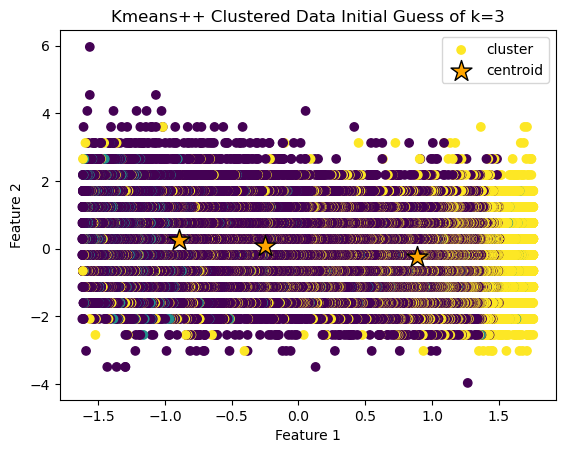

In [6]:
#6 Initial Guess 3 Cluster Kmeans++

# init used to initialize the cluster centroids - default is random but here we are choosing kmeans++ because it leads to faster convergence, n_init is the number of times to run the KMeans algo with different initializations - the default is 10 

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300, tol=1e-04, random_state=0).fit(df1_std)

print("Cluster memberships:\n{}".format(kmeans.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
plt.legend(["cluster", "centroid"], loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kmeans++ Clustered Data Initial Guess of k=3')
Kplt1 = plt.show()
Kplt1


    Sklearn documentation explains that the K-means++ implemented algorithm is known as "greedy k-means++" as it helps speed up convergence by iterating several trials over a single sampling step and then chooses the best centroid for that sample. 

    The kmeans.cluster_centers in the code finds the centroids (average) of similar points with continuous features marked with stars. 

    Too choose the best k we ran the k-means algorithm multiple times on the dataset until we judged 3 to be the optimal number k, centroids. This judgement is subjective and thus a limitation of k-means++ clustering method. To better judge our selected value for k we explore the elbow method. 



     To properly judge the performance and quality of the clustering with our selected value of 3 for k centroids, the Elbow method is done. The method graphically represents the findings of an the optimal K value by finding within cluster sum of squares (SSE). 

Distortion: 1431875.79


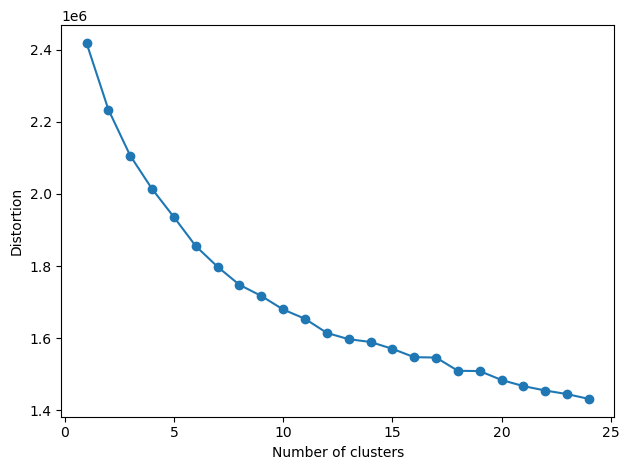

In [8]:
#7 Elbow Method to choose optimal k

print('Distortion: %.2f' % kmeans.inertia_)
distortions = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
    
    kmeans.fit(df1_std)
    
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1,25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
Kplte = plt.show()
Kplte

    If K increases, the distortion (inertia) will decrease. The plot helps us identify the value of K where the distortion begins to increase more rapidly, however the elbow here is subjective as it is somewhere between 6-10. Our best guess is 8. 

    Below is our K-means++ function that iterates over the cluster range of 5-12 (a  little wider for the suggested k from the elbow method) and hyperparameter tuning. 

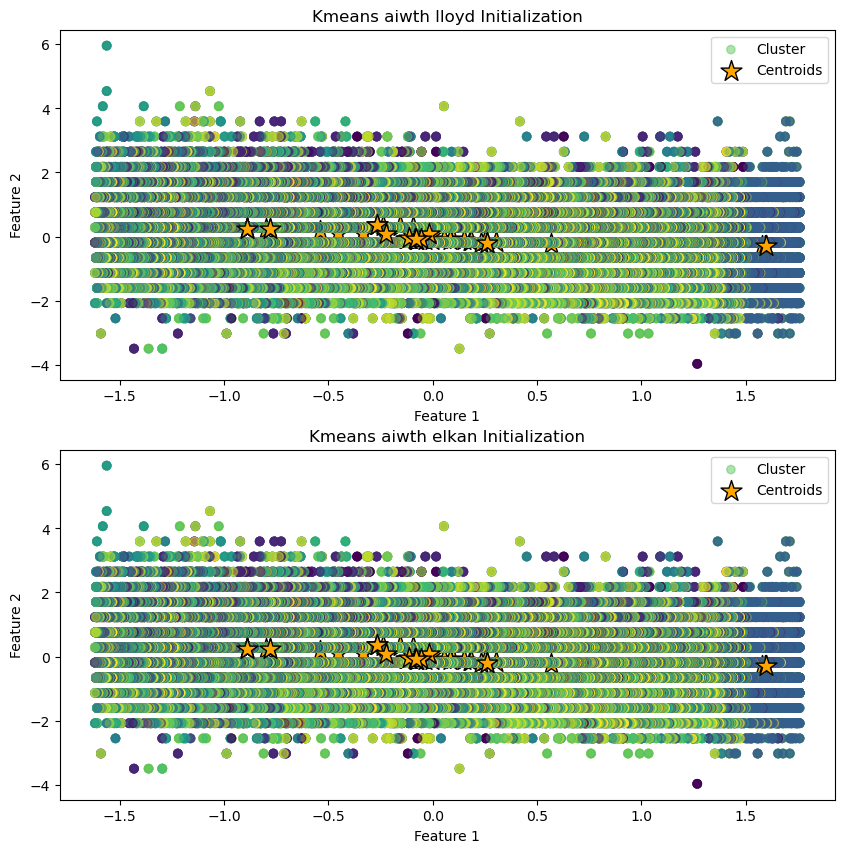

Centroids: [3 3 3 ... 9 6 1]
Silhouette Scores for each model: [0.08527615207030946, 0.09618289171403514, 0.09806539172081748, 0.07140163303693893, 0.09304182529725832, 0.07402998667889896, 0.0751817018331908, 0.08527615207030946, 0.09618289171403514, 0.09806539172081748, 0.07140163303693893, 0.09304182529725832, 0.07402998667889896, 0.0751817018331908]


In [16]:
# 8 K-Means++ Tuning 

# hyper-parameter tuning 
n_clusters_range = range(5, 12)
algorithms =["lloyd", "elkan"]
n_init = 'auto' # must be this way for kmeans++
max_iter = 300 # default for max iterations to convergence 

# function to iterate over the cluster range and hyper-parameter tuning
def kmeans_silhouette(df1_std, n_clusters=n_clusters_range, algorithms=algorithms, n_init=n_init, max_iter=300, plot=True):
    # silhouette score recording 
    silhouette_scores = []
    fig, axs = plt.subplots(len(algorithms), 1, figsize=(10,5*len(algorithms)))

    for ax, algorithm in zip(axs, algorithms):
        for n_clusters in n_clusters_range:
            ax.set_title(f'Kmeans with {algorithm} Initialization')
            kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=0)

            kmeans.fit(df1_std)
            # Calculate Silhouette Score
            silhouette_scores.append(silhouette_score(df1_std, kmeans.labels_))
            # Plot clustered data and centroids
            ax.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_, alpha=0.5)
            ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='orange', edgecolor='black', label='Centroids')
            ax.legend(["Cluster", "Centroids"], loc='best')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
    plt.show()
    return kmeans.labels_, kmeans.cluster_centers_, silhouette_scores

######################################################
# Assuming you have 'df1_std' and 'n_clusters_range' defined
labels, centers, scores = kmeans_silhouette(df1_std, n_clusters_range)
print("Centroids:", labels)
# print("Cluster Centers:", centers)
print("Silhouette Scores for each model:", scores)


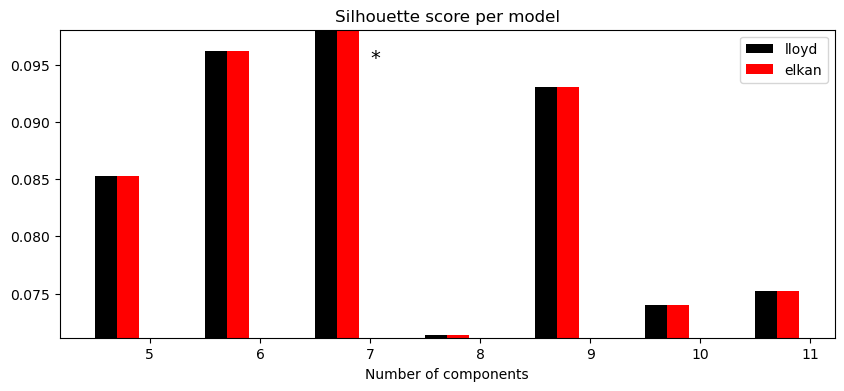

In [17]:
# 9 K-means++ Scores from fitting different hyper-parameters 

###############
# !pip install itertools
######################
sil = np.array(scores)
color_iter = itertools.cycle(['k', 'r'])
bars = []

plt.figure(figsize=(10, 4))
spl = plt.subplot(1, 1, 1)

# Plot the silhouette scores
for i, (algorithm, color) in enumerate(zip(algorithms, color_iter)):
    xpos = np.array(n_clusters_range) + 0.2 * (i - 2)
    bars.append(plt.bar(xpos, sil[i * len(n_clusters_range):(i + 1) * len(n_clusters_range)],
                        width=0.2, color=color))

plt.xticks(n_clusters_range)
plt.ylim([sil.min() * 1.01 - 0.01 * sil.max(), sil.max()])
plt.title('Silhouette score per model')

# Find the position for '*'
xpos = np.argmax(sil) % len(n_clusters_range)
plt.text(n_clusters_range[xpos], sil.max() * 0.97, '*', fontsize=14)


# Set xlabel and legend
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], algorithms)

plt.show()

# credit week 11 notebook for code inspiration


    The bar plot visualizes the number of components or clusters for each K-means++ algorithm (Lloyd, Elkan) by their silhouette score. The Lloyd and Elkan optimization algorithm methods update the centers in k-means clustering in different ways. Lloyd is the standard optimizer, that uses what is known as the "hill-climbing" approach by spending most of its time computing the distances between thh data points and the k-cluster centers for minimizing the k-means optimization criterion. While Elkan's is a variation of Lloyd's algorithm that reduces the number of distance calculations that need to be performed by using a triangular inequality to determine whether the distance between a data point is closer to its current centroid or to another centroid. If a given data point is closer to its current centroid than any other, then no distance calculation is performed. 

    Results: For a K-mean++ clustering method, the proper optimized number of components for this dataset is 7 and neither optimization method makes a difference in the silhouette score 0.098.
    


    # site: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.khoury.northeastern.edu/home/radivojac/classes/2021fallcs6220/hamerly_bookchapter_2014.pdf
    # site: https://www.vlfeat.org/api/kmeans-fundamentals.html#:~:text=Elkan's%20algorithm%20%5B7%5D%20is%20a,when%20assigning%20points%20to%20clusters.


/Users/tmc/opt/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster memberships:
[2 2 2 ... 3 5 1]


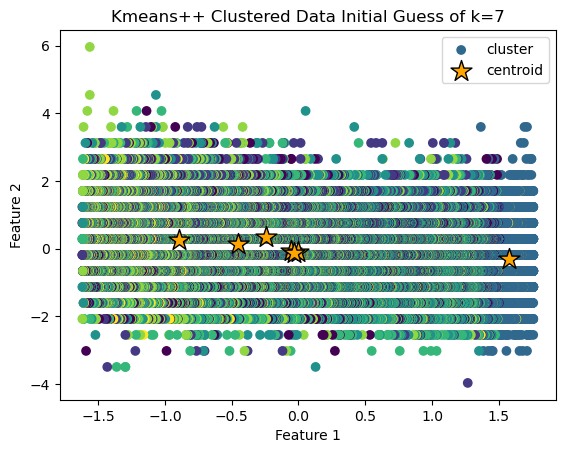

In [15]:
# 10 K-means++ Optimized Model for our given dataset from Mashable

kmeans = KMeans(init='k-means++', n_clusters=7, max_iter=300, random_state=0).fit(df1_std)

print("Cluster memberships:\n{}".format(kmeans.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
plt.legend(["cluster", "centroid"], loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kmeans++ Clustered Data Initial Guess of k=7')
Kplt_kmeans_optimized = plt.show()
Kplt_kmeans_optimized


    Optimzied K-means++ Clustering: A visualization of clustering using the optimized number of components is 7 with a silhouette score 0.098. The centroids are represented by stars and the clusters represented by different colored dots. 

In [ ]:
# 
# 
# 
# Comeback: MAYBE ADD PREDICT_FIT HERE AND LOOK AT HOW THEY DO BY CLUSTER IN THE SILHOUTTE PLOTS ???


# print("Cluster memberships:\n{}".format(kmeans.labels_))

# plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

# plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
# plt.legend(["cluster", "centroid"], loc='best')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Clustered Data')
# Kplt2 = plt.show()
# Kplt2

----

### Hierarchal / Agglomorative Clustering

    {need to fix/find where to best put}
    
    We dealt with these issues by using our domain knowledge and understanding of the dataset to eliminate features that were either duplicates of another feature or provided no predictive value to our model. 

    Agglomerative Clustering Refers to a collection of clustering algo that all build upon the same principles: the algo starts by declaring each point in its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied ( it has no predict method use fit_predict instead)-- quote from book 

    One advantage of the hierarchical clustering algorithm is that it allows us to plot dendrograms (visualizations of a binary hierarchical clustering), which can help with the interpretation of the results by creating meaningful taxonomies. Another advantage of this hierarchical approach is that we do not need to specify the number of clusters upfront. The two main approaches to hierarchical clustering are agglomerative and divisive hierarchical clustering. In divisive hierarchical clustering, we start with one cluster that encompasses the complete dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one example. In this section, we will focus on agglomerative clustering, which takes the opposite approach. We start with each example as an individual cluster and merge the closest pairs of clusters until only one cluster remains.



Hiarachal Clustering Dendrograms

In [21]:
# # GAVE UP ON DENDROGRAM TUNING -- doest work took 45min to run and was still going -- keep the cells below instead where we try different methods
# # 
# # Hiarachal Clustering tuning

# # hyper-parameter tuning 
# # methods = ["complete","average","ward"]
# # metrics = ["euclidean", "manhattan", "minkowski", "chebyshev", "canberra", "braycurtis","mahalanobis"]
# methods = ["complete","average"]
# metrics = ["euclidean", "manhattan"]
# optimal_ordering = True

# # function to iterate over the cluster range and hyper-parameter tuning
# def hierarchal_silhouette(df1_std, methods, metric=metrics, optimal_ordering=optimal_ordering):
#     # silhouette score recording 
#     silhouette_scores = []
#     result_dict = {'method': [], 'metric': [], 'silhouette_scores': []}

#     fig, axs = plt.subplots(len(methods), 1, figsize=(10,5*len(methods)))

#     for ax, method in zip(axs, methods):
#         for metric in metrics:
#             ax.set_title(f'Hierarchal with {method} Initialization')
           
#             # Convert DataFrame to a 2D array-like object
#             # data_array = df1_std.values
#             linkage_matrix = linkage(df1_std, method=method, metric=metric, optimal_ordering=optimal_ordering)


#             # Dendrogram the linkage matrix
#             dendrogram(linkage_matrix)
#             # Calculate Silhouette Score
#             silhouette_scores.append(silhouette_score(df1_std, linkage_matrix))
            
#             result_dict['method'].append(method)
#             result_dict['metric'].append(metric)
#             result_dict['silhouette_scores'].append(score)
            
#             ax = plt.gca()
#             bounds = ax.get_xbound()
#             plt.title('Hierarchical Clustering Dendrogram')
#             plt.xlabel('Sample Index')
#             plt.ylabel(' Cluster Distance')
#             plt.tight_layout()
            
#     ACDpltA = plt.show()
#     ACDpltA
#     return silhouette_scores

# ######################################################
# # Assuming you have 'df1_std' and 'n_clusters_range' defined

# # labels, centers, scores = kmeans_silhouette(df1_std, n_clusters_range)


# result_dict = hierarchal_silhouette(df1_std, methods, metrics, optimal_ordering)

# # Access the silhouette scores and other information
# for method, metric, score in zip(result_dict['method'], result_dict['metric'], result_dict['silhouette_scores']):
#     print(f"With method '{method}' and metric '{metric}', the silhouette score is {score}")



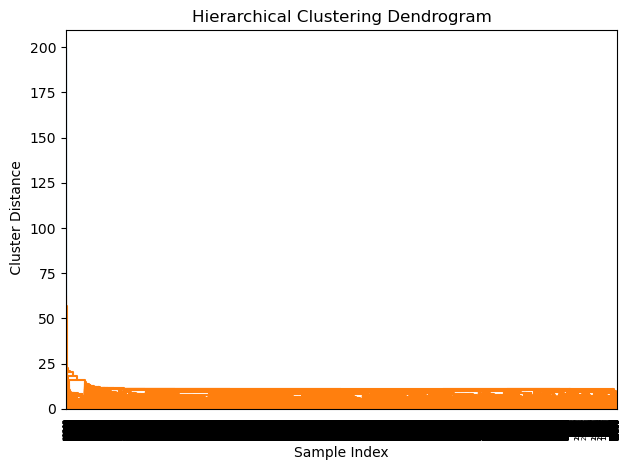

In [57]:
# 11 Hierarchal Clustering Method=Average

# average linkage 
# merges the two clusters that have the smallest average distance between all their points.

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='average')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
ACDpltA = plt.show()
ACDpltA

    This dendogram utilized the "average" linkage method which picks two clusters to merge that are the smallest distance between all other points.

    The resulting dendogram is nearly unintelligible given the sample index and the number of cluster distances at 25. This method is not optimal. 


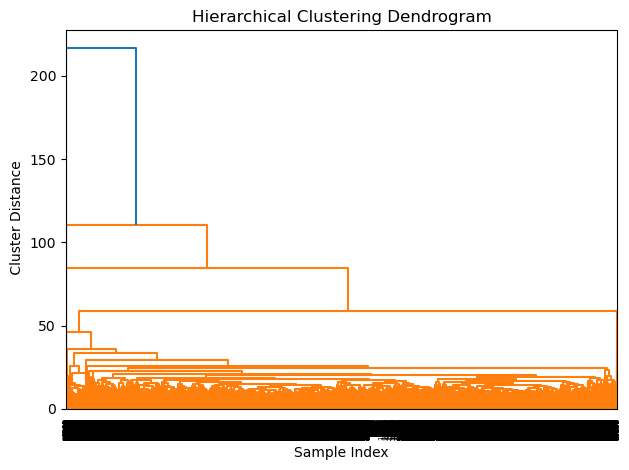

In [10]:
# 12 Hierarchal Clustering Method=complete

# complete linkage (also known as maximum linkage)
# merges the two clusters that have the smallest maximum distance between their points.

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='complete')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
ACDpltC= plt.show()
ACDpltC

    This dendogram utilized the "complete" linkage, also known as the "maximum linkage" method, picks two clusters to merge that are the smallest maximum distance between their points.

    The resulting dendogram shows some clear potential cluster cutoff lines that could be chosen. 




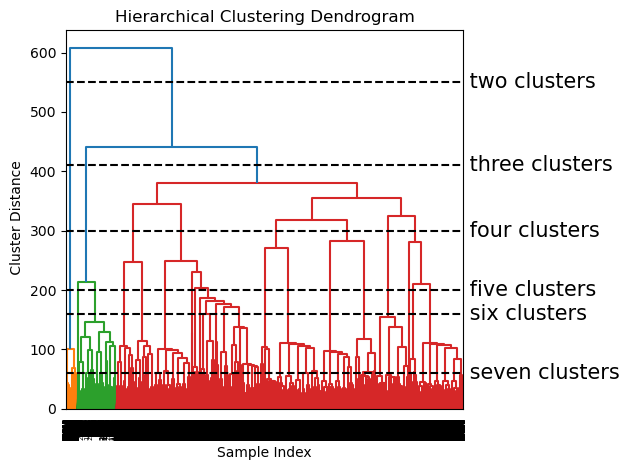

In [11]:
# 13 Hierarchal Clustering Method=ward

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='ward')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [550, 550], '--', c='k')
ax.plot(bounds, [410, 410], '--', c='k')
ax.text(bounds[1], 550, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 410, ' three clusters', va='center', fontdict={'size': 15})
ax.plot(bounds, [300, 300], '--', c='k')
ax.text(bounds[1], 300, ' four clusters', va='center', fontdict={'size': 15})
ax.plot(bounds, [200, 200], '--', c='k')
ax.text(bounds[1], 200, ' five clusters', va='center', fontdict={'size': 15})
ax.plot(bounds, [160, 160], '--', c='k')
ax.text(bounds[1], 160, ' six clusters', va='center', fontdict={'size': 15})
ax.plot(bounds, [60, 60], '--', c='k')
ax.text(bounds[1], 60, ' seven clusters', va='center', fontdict={'size': 15})
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
ACDpltW= plt.show()
ACDpltW

    The dendrogram shows cuts can be made at certain distance intervals. Seven clustes were identified. 

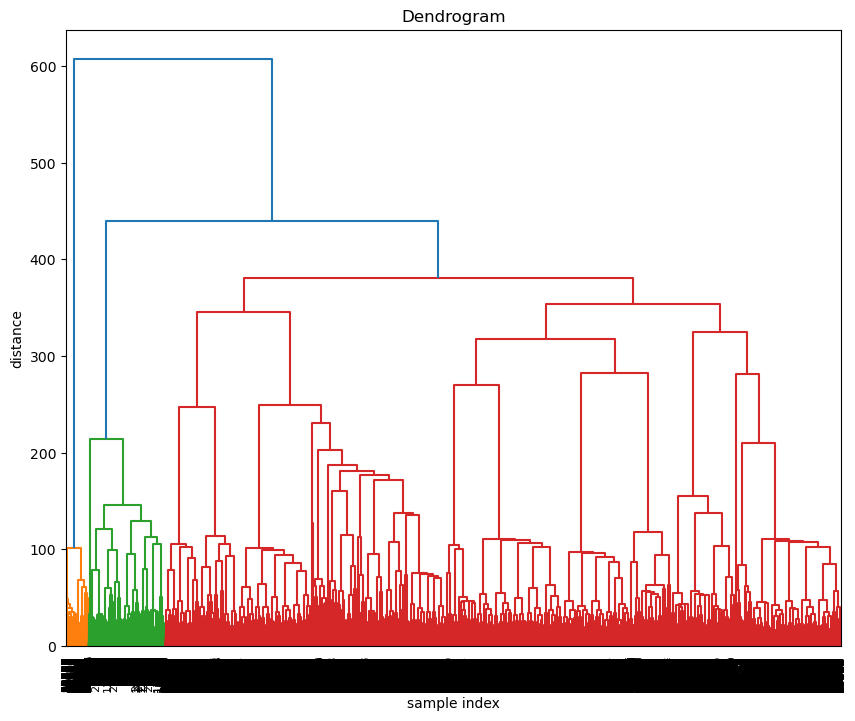

With 5 clusters, the silhouette score is 0.04719703051522329
With 6 clusters, the silhouette score is 0.0593168231401565
With 7 clusters, the silhouette score is 0.053060313773702135
With 8 clusters, the silhouette score is 0.058768950894333184
With 9 clusters, the silhouette score is 0.057757778061823424


In [6]:
# 14 Score the different number of cluster cuts on Dendrogram 

# Assign linkage

linkage_matrix = linkage(df1_std, method='ward')

plt.figure(figsize=(10, 8))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(linkage_matrix, leaf_font_size=8.,)

plt.show()

def sil_scores(df1_std, linkage_matrix, num_clusters_range):
    '''
    Creates a list of silhouette scores for a predetermined range of clusters.
    '''
    scores = []
    
    for num_clust in num_clusters_range:
        scores.append(silhouette_score(df1_std, fcluster(linkage_matrix, t=num_clust, criterion='maxclust')))
    
    return scores
num_clusters_range = range(5, 10)

scores = sil_scores(df1_std, linkage_matrix, num_clusters_range)

for t, s in zip(num_clusters_range, scores):
    print(f"With {t} clusters, the silhouette score is {s}")

    Hierarchal Clustering Results: The approach with 6 clusters performed best with a silhouette coefficient 0.059. 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.3 MB/s eta 0:00:000:00:01


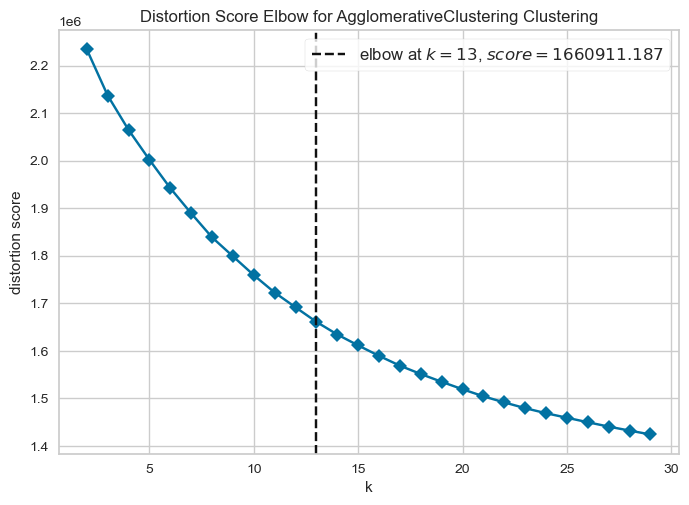

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
#14 Elbow Method Agglomerative method 

# in agglomerative method .fit modifies the model in place, fit_predict is use dot obtain the cluster_labels 

###########
# !pip install yellowbrick
###########

agg_model = AgglomerativeClustering()  
labels = agg_model.fit(df1_std)
# k is range of number of clusters.
visualizer = KElbowVisualizer(agg_model, k=(2,30), timings=False)
visualizer.fit(df1_std)
# Finalize and render figure
visualizer.show()

    Above we use the elbow method to find the optimized number of clusters, in this case this k=13 is the optimized number of clusters for basic Agglomerative Clustering model. 

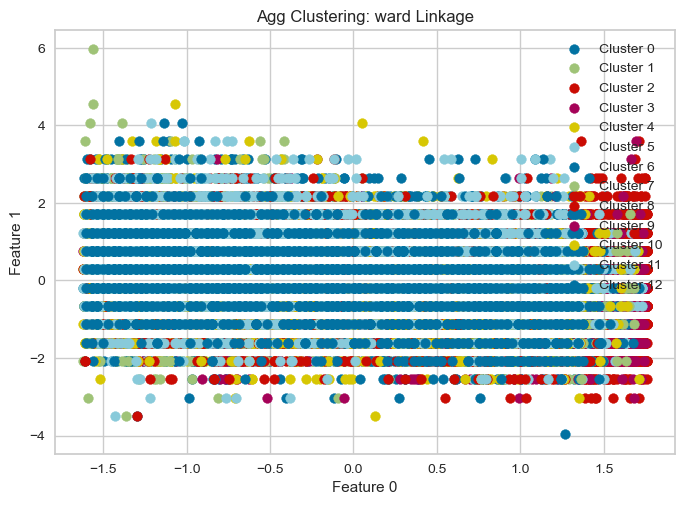

Silhouette Scores for ward linkage: (array([ 2,  2,  2, ...,  4,  1, 11]), [0.0672121258057528])


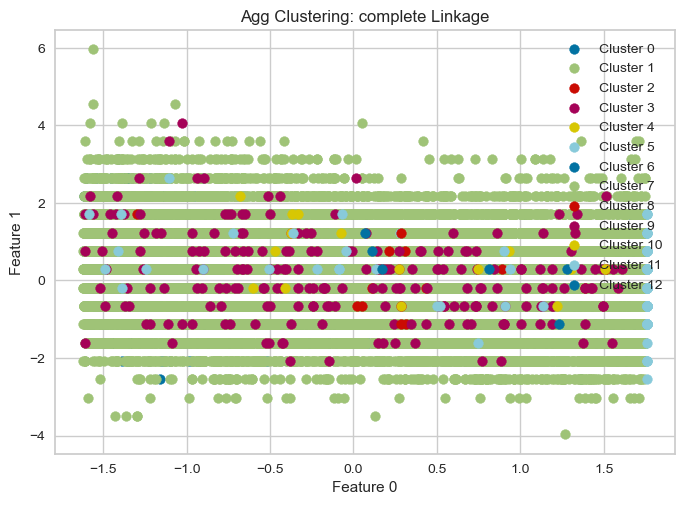

Silhouette Scores for complete linkage: (array([11, 11, 11, ...,  1,  1,  1]), [0.25715177148330653])


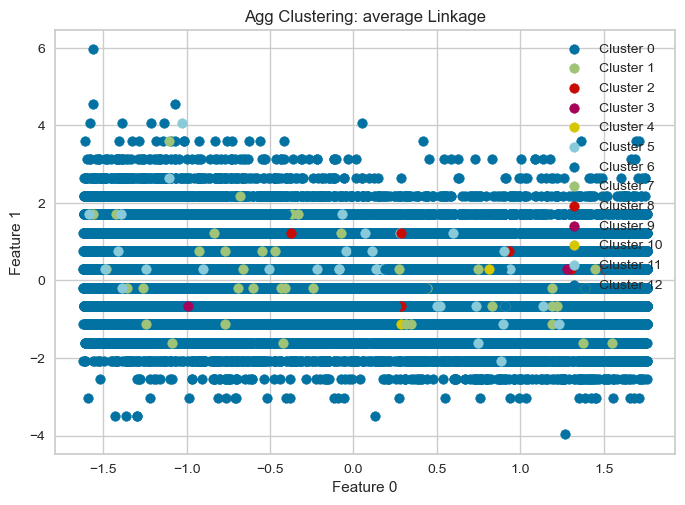

Silhouette Scores for average linkage: (array([0, 0, 0, ..., 0, 0, 0]), [0.4854058463717753])


In [35]:
# 15 Agglomerative Clustering with k=13 hyper-parameter tuning and silhouette scoring 

n_cluster = 13

def agglomerative_silhouette(df1_std, n_clusters=n_cluster, linkage=ward):
    # silhouette score recording 
    silhouette_scores = []
    fig, ax = plt.subplots()
    agg_model = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
    
    # labels = agg_model.fit_predict(df1_std)
    
    agg_model.fit(df1_std)  # Use fit instead of fit_predict
    labels = agg_model.labels_
    
    
    clusters = np.unique(labels)
    
    for cluster in clusters:
        plt.scatter(df1_std[labels == cluster, 0], df1_std[labels == cluster, 1], label=f'Cluster {cluster}')
        
    # Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(df1_std, labels))
    # ax.set_title(f'Agg Clustering: {linkage} Linkage, {metric} Metric')
    ax.set_title(f'Agg Clustering: {linkage} Linkage')
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.legend()
            
    ACpltW = plt.show()
    ACpltW
    return labels, silhouette_scores

######################################################
# To iterate over different linkages and get scores 
linkages = ["ward", "complete", "average"]
for linkage in linkages:
    scores = agglomerative_silhouette(df1_std, n_clusters=n_cluster, linkage=linkage)
    print(f"Silhouette Scores for {linkage} linkage:", scores)

    Agglomerative Clustering Results: The agglomerative approach performed best with the highest silhouette score recorded so far with 0.485 silhouette coefficient with 13 clusters using the average linkage method and Euclidean metric. 

In [ ]:
# Update: Bar Plot of Agglomerative Scores from fitting different hyper-parameters 

# ###############
# !pip install itertools
# ######################
# import itertools
# sil = np.array(scores)
# color_iter = itertools.cycle(['k', 'r'])
# bars = []

# plt.figure(figsize=(10, 4))
# spl = plt.subplot(1, 1, 1)

# # Plot the silhouette scores
# for i, (algorithm, color) in enumerate(zip(linkages, color_iter)):
#     xpos = np.array(n_clusters_range) + 0.2 * (i - 2)
#     bars.append(plt.bar(xpos, sil[i * len(n_clusters_range):(i + 1) * len(n_clusters_range)],
#                         width=0.2, color=color))

# plt.xticks(n_clusters_range)
# plt.ylim([sil.min() * 1.01 - 0.01 * sil.max(), sil.max()])
# plt.title('Silhouette score per model')

# # Find the position for '*'
# xpos = np.argmax(sil) % len(n_clusters_range)
# plt.text(n_clusters_range[xpos], sil.max() * 0.97, '*', fontsize=14)


# # Set xlabel and legend
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], algorithms)

# plt.show()

# credit week 11 notebook for code inspiration


    Linkage choice used in this dendrogram ward - the default -- ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized. 

    Other linkage options to use if ward doesnt work even thought it should work on most datasets, if the clusters have very dissimilar numbers of members meaning one is much bigger than the others then we can try these options - average: merges the two clusters that have the smallest avg distance between all their points, complete: aka maximum linkage merges the two clusters that have the smallest maximum distance between points 

----
### DBSCAN

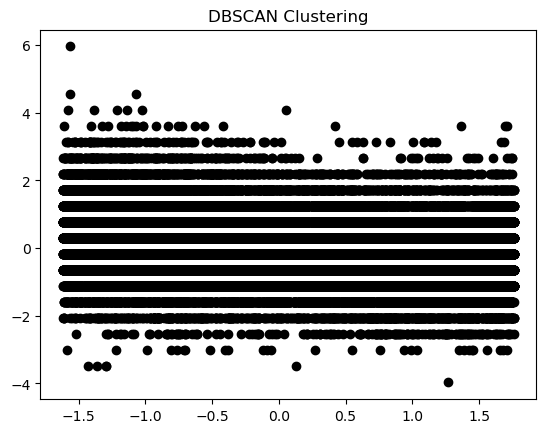

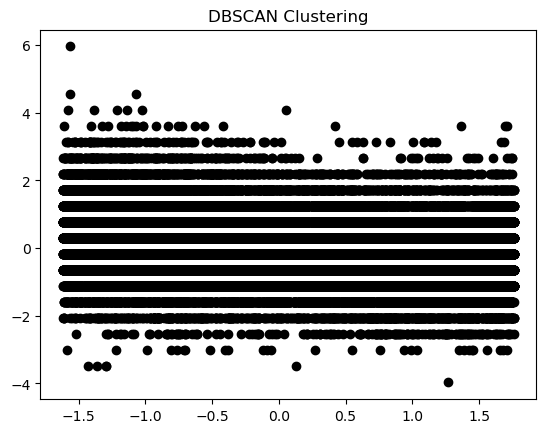

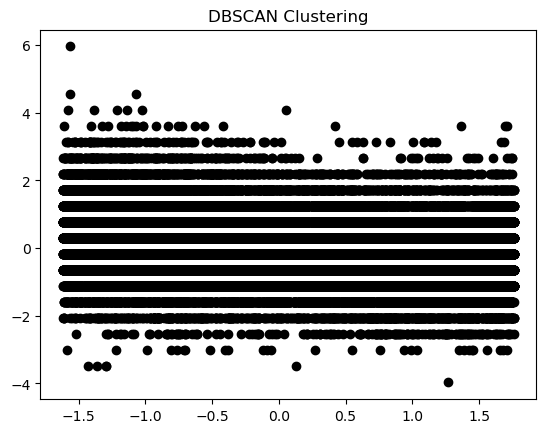

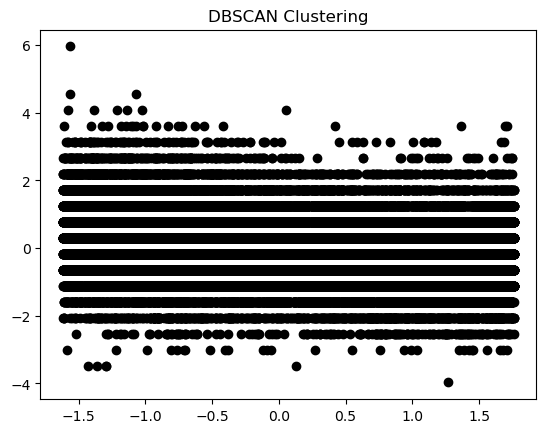

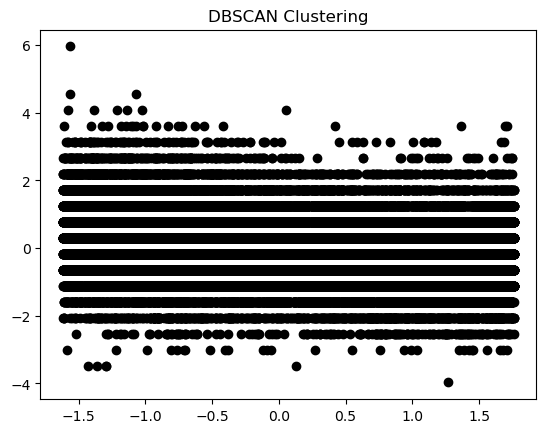

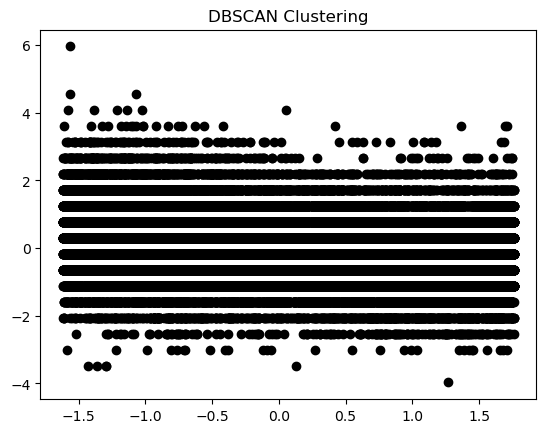

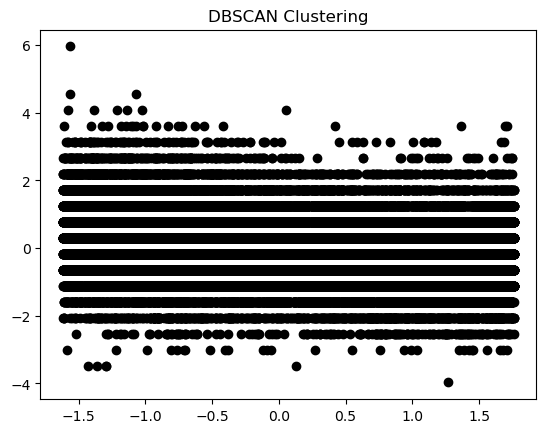

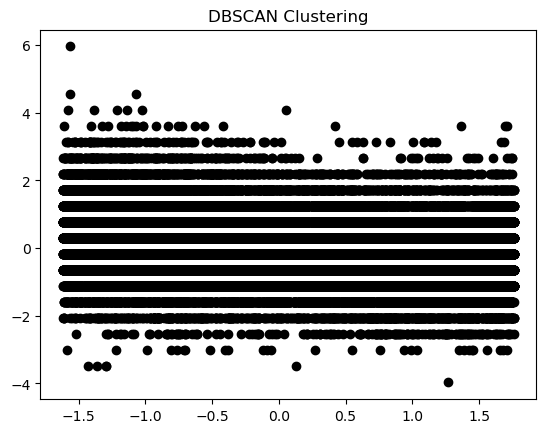

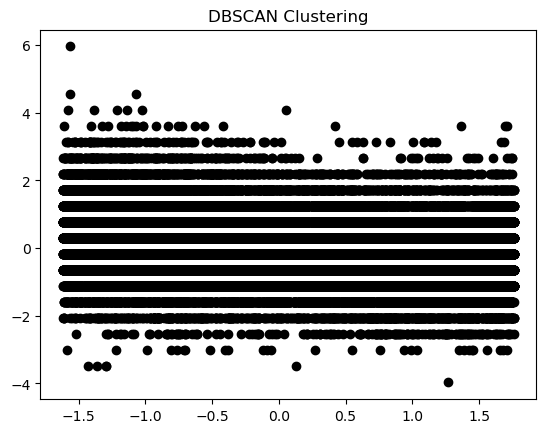

In [13]:
#16

# Perform DBSCAN clustering with different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df1_std)
        
        # Extract cluster labels and core sample indices
        cluster_labels = dbscan.labels_
        core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Plot the clusters
        unique_labels = set(cluster_labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (cluster_labels == k)

            xy = df1_std[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=14)

            xy = df1_std[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)

        plt.title('DBSCAN Clustering')
        plt.show()

    {UPDATE} WE NEED SOME SORT OF ANALYSIS OR COMMENT FOR THE DBSCAN PLOTS 

----

### FCM: Fuzzy C-Means Clustering

    Fuzzy C-Means Clustering - another type of unsupervised learning alogorithm that is also known as soft-Kmeans clustering. The name alludes to the way the alogrithm allows a point to have a varying degree of membership in each cluster. This method balances the distance between the a given point and the centroid of the cluster and the degree of each membership of each point in each cluster.

In [ ]:
# 17 Elbow Method on FCM 

# update the below 

# distortions = []
# for i in range(1, 25):
#     kmeans = KMeans(n_clusters=i,
#     init='k-means++',
#     n_init=10,
#     max_iter=300,
#     tol=1e-04,
#     random_state=0)
    
#     kmeans.fit(df1_std)
    
#     distortions.append(kmeans.inertia_)
    
# plt.plot(range(1,25), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.tight_layout()
# Kplte_elbow = plt.show()
# Kplte_elbow

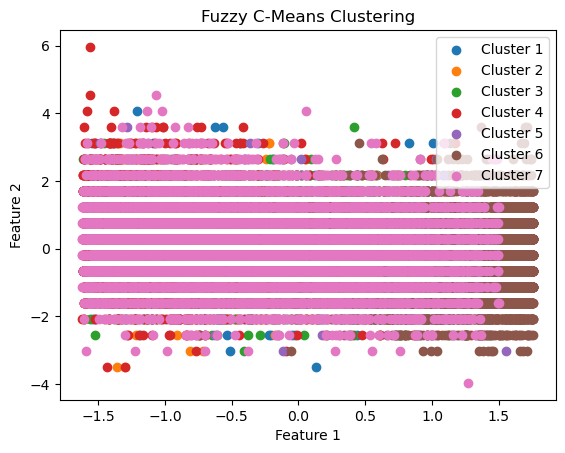

In [47]:
#18 FCM - hyperparmeter tuning / silhouette scoring 

# add hyper parameter tuning after figuring out n_clusters

# # Fuzzy C-Means Clustering - visualize, score it (there are other scoring methods too)
# # ! pip install scikit-fuzzy
# # Number of clusters
n_clusters = 7

# # Fuzzy c-means algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df1_std.T, n_clusters, 2, error=0.005, maxiter=1000)

# # Assign each data point to the cluster with the highest membership value
cluster_membership = np.argmax(u, axis=0)

# # Plotting the results
fig, ax = plt.subplots()
for j in range(n_clusters):
    ax.scatter(df1_std[cluster_membership == j, 0], df1_std[cluster_membership == j, 1], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fuzzy C-Means Clustering')
plt.show()
plt.show()

# # citing source https://medium.com/@avinashkella/understanding-fuzzy-c-means-clustering-with-python-implementation-a-beginners-guide-3dbdf180393b

    FCM and Kmeans in practice typically produce  very similar results.


In [ ]:
# 19 silhouette score bar chart for FCM 

# update the below 

# # 9 K-means++ Scores from fitting different hyper-parameters 

# ###############
# !pip install itertools
# ######################
# import itertools
# sil = np.array(scores)
# color_iter = itertools.cycle(['k', 'r'])
# bars = []

# plt.figure(figsize=(10, 4))
# spl = plt.subplot(1, 1, 1)

# # Plot the silhouette scores
# for i, (algorithm, color) in enumerate(zip(algorithms, color_iter)):
#     xpos = np.array(n_clusters_range) + 0.2 * (i - 2)
#     bars.append(plt.bar(xpos, sil[i * len(n_clusters_range):(i + 1) * len(n_clusters_range)],
#                         width=0.2, color=color))

# plt.xticks(n_clusters_range)
# plt.ylim([sil.min() * 1.01 - 0.01 * sil.max(), sil.max()])
# plt.title('Silhouette score per model')

# # Find the position for '*'
# xpos = np.argmax(sil) % len(n_clusters_range)
# plt.text(n_clusters_range[xpos], sil.max() * 0.97, '*', fontsize=14)


# # Set xlabel and legend
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], algorithms)

# plt.show()

# # credit week 11 notebook for code inspiration


----

### Gaussian Mixture Model

    GMM - A Gaussian Mixture Model is a another method that will try to find a mix of multi-dimensional Gaussian probability distributions that best model any feature in the dataset. 

    cite source: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    cite source: https://www.datatechnotes.com/2022/07/clustering-example-with-gaussian.html

In [15]:
#20

# Gaussian Mixture Models (GMM) - visualize, score it (there are other scoring methods too)
gmm = GaussianMixture(n_components=7).fit(df1_std)

gmm.get_params() 

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 7,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

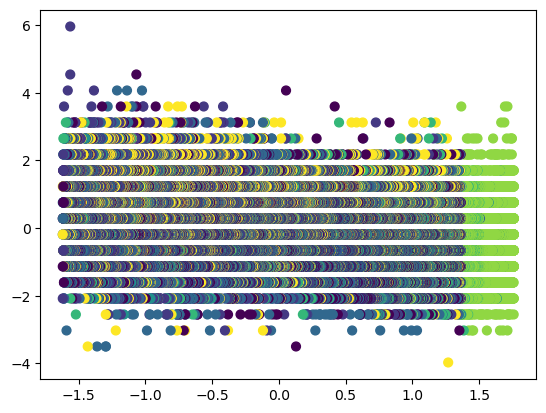

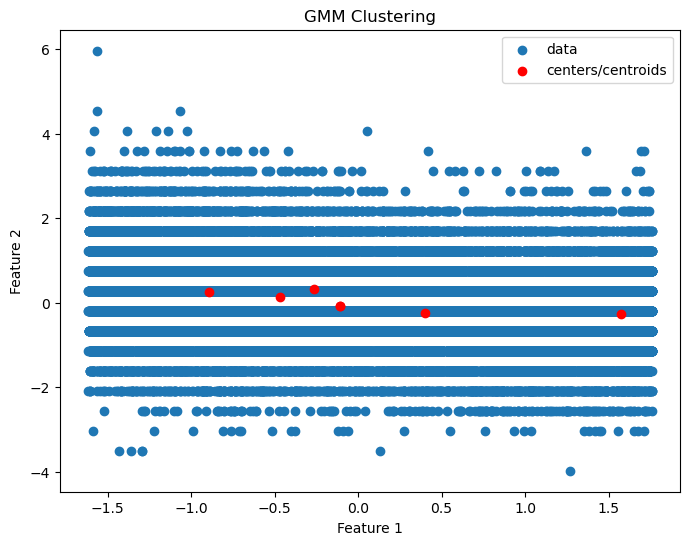

In [16]:
#21 Gaussian Mixture Models (GMM) - visualize, score it (there are other scoring methods too)
gmm = GaussianMixture(n_components=7).fit(df1_std)

gmm.get_params() 


labels = gmm.predict(df1_std)
plt.scatter(df1_std[:, 0], df1_std[:, 1], c=labels, s=40, cmap='viridis');

probs = gmm.predict_proba(df1_std)
# print(probs[:5].round(3))

# obtain the center of each cluster
centers = gmm.means_
# print(centers)

# take centers and visualize them 
plt.figure(figsize=(8, 6))
plt.scatter(df1_std[:,0], df1_std[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers/centroids")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("GMM Clustering")
GMMplt= plt.show()
GMMplt




In [ ]:
# 22 Need to add BIC and Silhouette Scoring for GMM 


##### this below is a method from our class note book 
# from sklearn import mixture



# lowest_bic = np.infty
# bic = []
# n_components_range = range(7, 10)
# cv_types = ['spherical', 'diag', 'full']
# for cv_type in cv_types:
#     for n_components in n_components_range:
#         # Fit a mixture of Gaussians with EM
#         gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
#         gmm.fit(X)
#         bic.append(gmm.bic(X))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm
            
# this code has been manipulated from the source available on sklearn's website documentation
# plot the BIC
# bic = np.array(bic)
# color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
# clf = best_gmm
# bars = []

# plt.figure(figsize=(10,4))
# spl = plt.subplot(1,1,1)
# # Plot the BIC scores
# for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#     xpos = np.array(n_components_range) + .2 * (i - 2)
#     bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                   (i + 1) * len(n_components_range)],
#                         width=.2, color=color))
# plt.xticks(n_components_range)
# plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
# plt.title('BIC score per model')

# xpos = np.min(n_components_range)-0.4 + np.mod(bic.argmin(), len(n_components_range)) +\
#     .2 * np.floor(bic.argmin() / len(n_components_range))
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], cv_types)

# plt.show()

In [ ]:
# 23 silhouette score bar chart for GMM 

# update the below 

# # 9 K-means++ Scores from fitting different hyper-parameters 

# ###############
# !pip install itertools
# ######################
# import itertools
# sil = np.array(scores)
# color_iter = itertools.cycle(['k', 'r'])
# bars = []

# plt.figure(figsize=(10, 4))
# spl = plt.subplot(1, 1, 1)

# # Plot the silhouette scores
# for i, (algorithm, color) in enumerate(zip(algorithms, color_iter)):
#     xpos = np.array(n_clusters_range) + 0.2 * (i - 2)
#     bars.append(plt.bar(xpos, sil[i * len(n_clusters_range):(i + 1) * len(n_clusters_range)],
#                         width=0.2, color=color))

# plt.xticks(n_clusters_range)
# plt.ylim([sil.min() * 1.01 - 0.01 * sil.max(), sil.max()])
# plt.title('Silhouette score per model')

# # Find the position for '*'
# xpos = np.argmax(sil) % len(n_clusters_range)
# plt.text(n_clusters_range[xpos], sil.max() * 0.97, '*', fontsize=14)


# # Set xlabel and legend
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], algorithms)

# plt.show()

# # credit week 11 notebook for code inspiration


    {This may need to be changed}
    We are using a GMM model with 7 clusters as per our elbow method for the best guess. 

    Centroids or centers for the 7 clusters (n_components) in the GMM model is shown in red dots with the data points in blue. 

----

### OPTIC Clustering

    OPTIC Clustering -- Ordering Points To Identify Clustering Structure a density based unsupervised learning algorithm similar to DBSCAN. OPTICS unlike DBSCAN deos not require the density to be consistent across a dataset, so for OPTICS we can discard eps (constant distance parameter).

    site Source: https://towardsdatascience.com/understanding-optics-and-implementation-with-python-143572abdfb6
    site Source: https://cdanielaam.medium.com/understanding-optics-clustering-hands-on-with-scikit-learn-1786bddc71f5
    site Source:  https://www.geeksforgeeks.org/ml-optics-clustering-explanation/
    

In [ ]:
# 24 Elbow Method for OPTIC Clustering  

# update the below 

# distortions = []
# for i in range(1, 25):
#     kmeans = KMeans(n_clusters=i,
#     init='k-means++',
#     n_init=10,
#     max_iter=300,
#     tol=1e-04,
#     random_state=0)
    
#     kmeans.fit(df1_std)
    
#     distortions.append(kmeans.inertia_)
    
# plt.plot(range(1,25), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.tight_layout()
# Kplte_elbow = plt.show()
# Kplte_elbow

Cluster Labels: [-1 -1 -1 ...  0  0  0]
Cluster memberships:
[-1 -1 -1 ...  0  0  0]


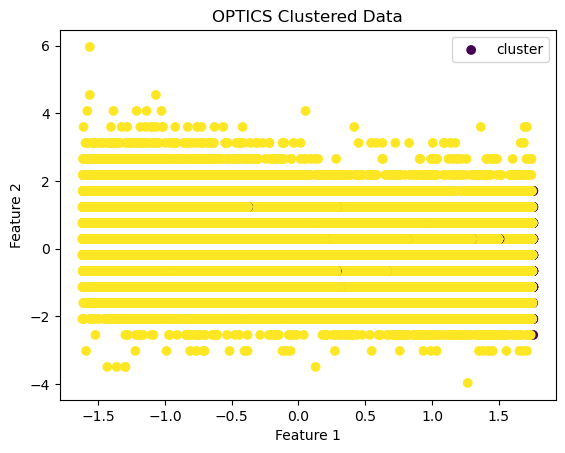

In [7]:
# 25 Add another OPTICS (Ordering Points To Identify Clustering Structure): Method Spectral Clustering:- visualize, score it (there are other scoring methods too)

# Fit the OPTICS model
clustering = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
clustering.fit(df1_std)

# Extract the clusters
labels = clustering.labels_

# Print the cluster labels
print("Cluster Labels:", labels)

print("Cluster memberships:\n{}".format(clustering.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=clustering.labels_)

# Calculate the number of clusters
num_clusters = len(np.unique(labels))
# Update the legend with the number of clusters
plt.legend(["cluster"] * num_clusters, loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('OPTICS Clustered Data')
optic_plt1 = plt.show()
optic_plt1

In [ ]:
# 26 silhouette score bar chart for OPTICS 

# update the below 

# # 9 K-means++ Scores from fitting different hyper-parameters 

# ###############
# !pip install itertools
# ######################
# import itertools
# sil = np.array(scores)
# color_iter = itertools.cycle(['k', 'r'])
# bars = []

# plt.figure(figsize=(10, 4))
# spl = plt.subplot(1, 1, 1)

# # Plot the silhouette scores
# for i, (algorithm, color) in enumerate(zip(algorithms, color_iter)):
#     xpos = np.array(n_clusters_range) + 0.2 * (i - 2)
#     bars.append(plt.bar(xpos, sil[i * len(n_clusters_range):(i + 1) * len(n_clusters_range)],
#                         width=0.2, color=color))

# plt.xticks(n_clusters_range)
# plt.ylim([sil.min() * 1.01 - 0.01 * sil.max(), sil.max()])
# plt.title('Silhouette score per model')

# # Find the position for '*'
# xpos = np.argmax(sil) % len(n_clusters_range)
# plt.text(n_clusters_range[xpos], sil.max() * 0.97, '*', fontsize=14)


# # Set xlabel and legend
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], algorithms)

# plt.show()

# # credit week 11 notebook for code inspiration


___
___
<a href="#top">Back to Top</a>
<a id="ModelEval2"></a>
## Modeling and Evaluation 2 (10 points total)
Evaluate and Compare

----

### KMeans++


    Another evaluation method to judge the performance and quality of clustering is the silhouette analysis. We can plot the analysis to judge how tight the items are grouped together in clusters. 

    In order to do silhouttee analysis we have to use fit_predict a combination of both fitting of the model and prediction of cluster labels in a single step, which allows us to calculate the silhouette scores directly. 

In [18]:
#17

# Silhouette Analysis 

kmeans = KMeans(init='k-means++',n_clusters=7, n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = kmeans.fit_predict(df1_std)

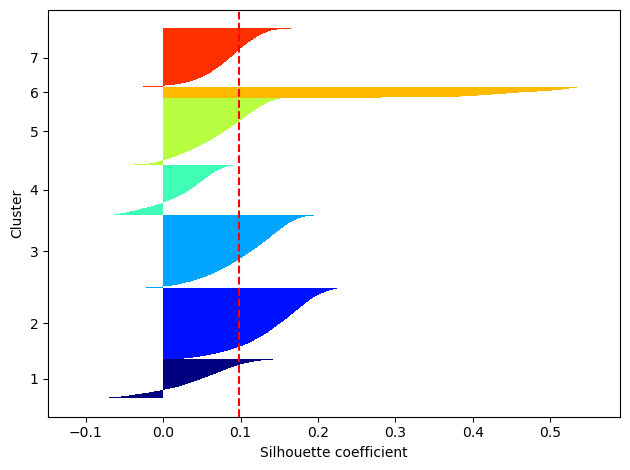

Silhouette Coefficient: 0.098


In [19]:
#18

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.tight_layout()
SKplt = plt.show()
SKplt

labels = kmeans.labels_

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))

    The average silhouette coefficient is indicated by the red dotted line. The red clustering (Cluster 7) performed best (above average) which indicates it is relatively well-separated and cohesive thus the data points more similar to each other than they are to data points in neighboring clusters. The resulting plot shows that overall the silhouettes are visibly different lengths and widths which is indicative of sub-optimal clustering. We also have clusters that go below zero indicating that these clusters were on a decision boundary and struggled to cluster the points. 

    Ideally we would want the silhouette coefficient should be closer to 1 to indicate better quality of clustering. 

----
### Agglomorative Clustering

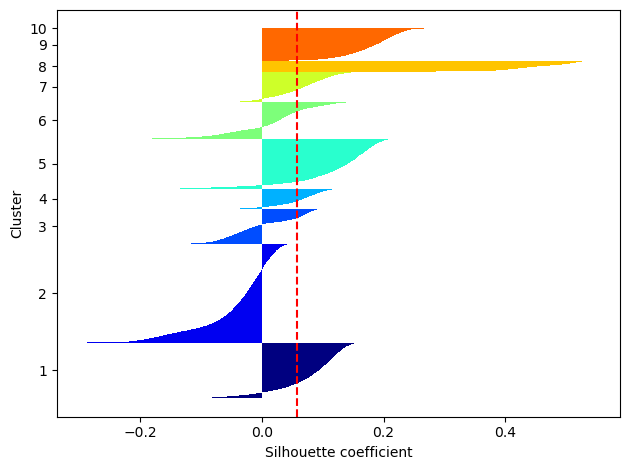

Silhouette Coefficient: 0.057


In [20]:
#19

# SCORE THE AGGLOMORATIVE METHOD 
model = AgglomerativeClustering(linkage='ward', n_clusters=10)

# Agglomerative clustering has no predict method, to build a model and get clustering memberships on the training set, we have to use the fit_predict method 
y_km = model.fit_predict(df1_std)
# Get the cluster assignments
labels = model.labels_

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.tight_layout()
SACplt = plt.show()
SACplt

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))

    The silhouettes have visibly different lengths and widths which is evidence of suboptimal clustering. The red-dotted line illustrates the average silhouette coefficient with some clusters performing below the average. Some clusters also struggled to properly cluster points as they are near decision boundaries. 

    For a good cluster we would like to see a silhouette coefficient closer to one, our highest in the plot was around 0.5. 

----
### OPTIC Clustering

    {Working}  Evaluate -- two clear clusters reduced to by tSNE - again im not sure this a proper approach ?? to make our clustering look better -- we need to visualize but this is 2D and by applying tsne we reduce our 60plus features down to the two most important then visualize the cluster was the thought process. 

In [22]:
#21

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df1_std, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.0574600527512066


___
___
<a href="#top">Back to Top</a>
<a id="ModelEval3"></a>
## Modeling and Evaluation 3 (10 points total)
Visualize Results

----

### KMeans++

In [23]:
#22
# is #6
# Initial Guess 3 Cluster Kmeans++

# init used to initialize the cluster centroids - default is random but here we are choosing kmeans++ because it leads to faster convergence, n_init is the number of times to run the KMeans algo with different initializations - the default is 10 


kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300, tol=1e-04, random_state=0).fit(df1_std)

print("Cluster memberships:\n{}".format(kmeans.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
plt.legend(["cluster", "centroid"], loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kmeans++ Clustered Data Initial Guess of k=3')
plt.show()

# previously saved graph
# Kplt1

    Sklearn documentation explains that the K-means++ implemented algorithm is known as "greedy k-means++" as it helps speed up convergence by iterating several trials over a single sampling step and then chooses the best centroid for that sample. 

    The kmeans.cluster_centers in the code finds the centroids (average) of similar points with continuous features marked with stars. 

    Too choose the best k we ran the k-means algorithm multiple times on the dataset until we judged 3 to be the optimal number k, centroids. This judgement is subjective and thus a limitation of k-means++ clustering method. To better judge our selected value for k we explore the elbow method. 



     To properly judge the performance and quality of the clustering with our selected value of 3 for k centroids, the Elbow method is done. The method graphically represents the findings of an the optimal K value by finding within cluster sum of squares (SSE). 

    The centroids are are illustrated by stars and clusters indicated by different colored circles.

In [24]:
#23
# is #7
# Elbow Method to choose optimal k

print('Distortion: %.2f' % kmeans.inertia_)
distortions = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
    
    kmeans.fit(df1_std)
    
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1,25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# previously saved graph
# Kplte

    If K increases, the distortion (inertia) will decrease. The plot helps us identify the value of K where the distortion begins to increase more rapidly, however the elbow here is subjective as it is somewhere between 6-10. Our best guess is 8. 

    The plot's elbow is somewhere between 5-10 clusters. Our best guess is 7. So below we run the clustering again with 7 clusters. 

In [1]:
# need #8
# K-Means++ Tuning 

# hyper-parameter tuning 
n_clusters_range = range(5, 12)
algorithms =["lloyd", "elkan"]
n_init = 'auto' # must be this way for kmeans++
max_iter = 300 # default for max iterations to convergence 

# function to iterate over the cluster range and hyper-parameter tuning
def kmeans_silhouette(df1_std, n_clusters=n_clusters_range, algorithms=algorithms, n_init=n_init, max_iter=300, plot=True):
    # silhouette score recording 
    silhouette_scores = []
    fig, axs = plt.subplots(len(algorithms), 1, figsize=(10,5*len(algorithms)))

    for ax, algorithm in zip(axs, algorithms):
        for n_clusters in n_clusters_range:
            ax.set_title(f'Kmeans with {algorithm} Initialization')
            kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=0)

            kmeans.fit(df1_std)
            # Calculate Silhouette Score
            silhouette_scores.append(silhouette_score(df1_std, kmeans.labels_))
            # Plot clustered data and centroids
            ax.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_, alpha=0.5)
            ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='orange', edgecolor='black', label='Centroids')
            ax.legend(["Cluster", "Centroids"], loc='best')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
    plt.show()
    return kmeans.labels_, kmeans.cluster_centers_, silhouette_scores

######################################################
# Assuming you have 'df1_std' and 'n_clusters_range' defined
labels, centers, scores = kmeans_silhouette(df1_std, n_clusters_range)
print("Centroids:", labels)
# print("Cluster Centers:", centers)
print("Silhouette Scores for each model:", scores)

In [ ]:
# need #9
# K-means++ Scores from fitting different hyper-parameters 

sil = np.array(scores)
color_iter = itertools.cycle(['k', 'r'])
bars = []

plt.figure(figsize=(10, 4))
spl = plt.subplot(1, 1, 1)

# Plot the silhouette scores
for i, (algorithm, color) in enumerate(zip(algorithms, color_iter)):
    xpos = np.array(n_clusters_range) + 0.2 * (i - 2)
    bars.append(plt.bar(xpos, sil[i * len(n_clusters_range):(i + 1) * len(n_clusters_range)],
                        width=0.2, color=color))

plt.xticks(n_clusters_range)
plt.ylim([sil.min() * 1.01 - 0.01 * sil.max(), sil.max()])
plt.title('Silhouette score per model')

# Find the position for '*'
xpos = np.argmax(sil) % len(n_clusters_range)
plt.text(n_clusters_range[xpos], sil.max() * 0.97, '*', fontsize=14)

# Set xlabel and legend
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], algorithms)

plt.show()

    The bar plot visualizes the number of components or clusters for each K-means++ algorithm (Lloyd, Elkan) by their silhouette score. The Lloyd and Elkan optimization algorithm methods update the centers in k-means clustering in different ways. Lloyd is the standard optimizer, that uses what is known as the "hill-climbing" approach by spending most of its time computing the distances between thh data points and the k-cluster centers for minimizing the k-means optimization criterion. While Elkan's is a variation of Lloyd's algorithm that reduces the number of distance calculations that need to be performed by using a triangular inequality to determine whether the distance between a data point is closer to its current centroid or to another centroid. If a given data point is closer to its current centroid than any other, then no distance calculation is performed. 

    Results: For a K-mean++ clustering method, the proper optimized number of components for this dataset is 7 and neither optimization method makes a difference in the silhouette score 0.098.
    
    # cite: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.khoury.northeastern.edu/home/radivojac/classes/2021fallcs6220/hamerly_bookchapter_2014.pdf
    # cite: https://www.vlfeat.org/api/kmeans-fundamentals.html#:~:text=Elkan's%20algorithm%20%5B7%5D%20is%20a,when%20assigning%20points%20to%20clusters.


In [ ]:
# need #10
# K-means++ Optimized Model for our given dataset from Mashable

kmeans = KMeans(init='k-means++', n_clusters=7, max_iter=300, random_state=0).fit(df1_std)

print("Cluster memberships:\n{}".format(kmeans.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
plt.legend(["cluster", "centroid"], loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kmeans++ Clustered Data Initial Guess of k=7')
plt.show()

    Optimzied K-means++ Clustering: A visualization of clustering using the optimized number of components is 7 with a silhouette score 0.098. The centroids are represented by stars and the clusters represented by different colored dots. 

In [25]:
#24
# add #18
# Silhouette Analysis Kmeans
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.tight_layout()
SKplt = plt.show()
SKplt

labels = kmeans.labels_

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))
# previously saved graph
# SKplt

    The average silhouette coefficient is indicated by the red dotted line. The red clustering (Cluster 7) performed best (above average) which indicates it is relatively well-separated and cohesive thus the data points more similar to each other than they are to data points in neighboring clusters. The resulting plot shows that overall the silhouettes are visibly different lengths and widths which is indicative of sub-optimal clustering. We also have clusters that go below zero indicating that these clusters were on a decision boundary and struggled to cluster the points. 

    Ideally we would want the silhouette coefficient should be closer to 1 to indicate better quality of clustering. 

----
### Hierarchical Clustering/Aggglomerative Clutsering

In [ ]:
#26
# add #11
# Agglomerative Clustering/Hierarchal Clustering using Method=Average

# average linkage 
# merges the two clusters that have the smallest average distance between all their points.

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='average')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
plt.show()

    This dendogram utilized the "average" linkage method which picks two clusters to merge that are the smallest distance between all other points.

    The resulting dendogram is nearly unintelligible given the sample index and the number of cluster distances at 25. This method is not optimal. 


In [ ]:
#27
# add #12
# Agglomerative Clustering/ Hierarchal Clustering using Method=complete

# complete linkage (also known as maximum linkage)
# merges the two clusters that have the smallest maximum distance between their points.

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='complete')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
plt.show()

    This dendogram utilized the "complete" linkage, also known as the "maximum linkage" method, picks two clusters to merge that are the smallest maximum distance between their points.

    The resulting dendogram shows some clear potential cluster cutoff lines that could be chosen. 




In [ ]:
#28
# add #14
# Score the different number of cluster cuts on Dendrogram 

# Assign linkage

linkage_matrix = linkage(df1_std, method='ward')

plt.figure(figsize=(10, 8))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(linkage_matrix, leaf_font_size=8.,)

plt.show()

def sil_scores(df1_std, linkage_matrix, num_clusters_range):
    '''
    Creates a list of silhouette scores for a predetermined range of clusters.
    '''
    scores = []
    
    for num_clust in num_clusters_range:
        scores.append(silhouette_score(df1_std, fcluster(linkage_matrix, t=num_clust, criterion='maxclust')))
    
    return scores
num_clusters_range = range(5, 10)

scores = sil_scores(df1_std, linkage_matrix, num_clusters_range)

for t, s in zip(num_clusters_range, scores):
    print(f"With {t} clusters, the silhouette score is {s}")
# Agglomerative Clustering using 'ward' method
ACDpltW

    Hierarchal Clustering Results: The approach with 6 clusters performed best with a silhouette coefficient 0.059. 


    Linkage choice is ward - the default -- ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized. 

    Other linkage options to use if ward doesnt work even thought it should work on most datasets, if the clusters have very dissimilar numbers of members meaning one is much bigger than the others then we can try these options - average: merges the two clusters that have the smallest avg distance between all their points, complete: aka maximum linkage merges the two clusters that have the smallest maximum distance between points 

    This dendogram utilized the "ward" linkage method (default method) picks two clusters to merge such that the variance increases the least, this creates clusters that usually more evenly sized. 

    # not sure i need to site as this is not word for word from the book but just in case I am noting it here. 
    # Refer to Introduction of Machine Learning Chapter 3: Unsupurvised Learning and Processing p.182

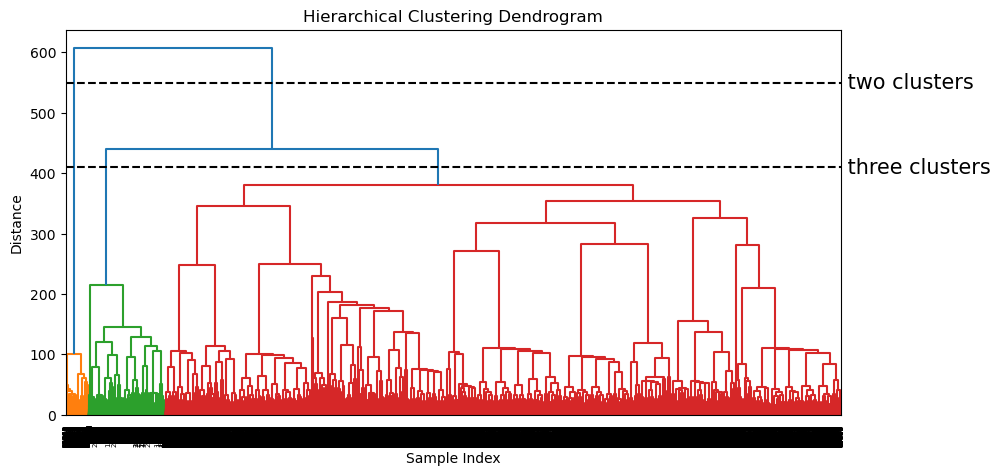

In [26]:
#25

# alt of #13
# Dendogram

# Perform hierarchical clustering
linkage_matrix = linkage(df1_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)

# list clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [550, 550], '--', c='k')
ax.plot(bounds, [410, 410], '--', c='k')
ax.text(bounds[1], 550, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 410, ' three clusters', va='center', fontdict={'size': 15})

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

    The dendrogram shows cuts can be made at certain distance intervals. ?Seven? clustes were identified. 

##### More lines needed??

    Hierarchical cluster assignment (shown as lines) generated with agglomerative clustering, with numbered data point. Here we are looking at all possible clusters jointly, the above visual shows an overlay of all the possible clustering providing insight into how each cluster breaks up into smaller clusters. This visual however only works when we have two features (relies on two dimensional nature of the data), when we have more than two features we must use a dendrogram that can handle multidimensional datasets.

    Dendogram of the clustering shown above with lines indicating splits into two and three clusters. The y-axis specifies when the agglomerative algorithm two clusters are merged and the length of each branch shows how far apart the merged clusters are. 

    Using agglometerative clustering the algorithm has chosen 9 clusters. The hierarchal clustering method iteratively proceeded through every point and selected   2 more clusters than our previous elbow method. The dendrogram is a more appropriate visual for this dataset (more than two features). 

#### Silhouette method for evaluation

In [31]:
#30
# add #19
# previously saved graph using 'ward' method
# SCORE THE AGGLOMORATIVE METHOD 
model = AgglomerativeClustering(linkage='ward', n_clusters=10)

# Agglomerative clustering has no predict method, to build a model and get clustering memberships on the training set, we have to use the fit_predict method 
y_km = model.fit_predict(df1_std)
# Get the cluster assignments
labels = model.labels_

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.tight_layout()
SACplt = plt.show()
SACplt

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))
# SACplt

In [ ]:
# was 14 
# Elbow Method Agglomerative method 

# in agglomerative method .fit modifies the model in place, fit_predict is use dot obtain the cluster_labels 

agg_model = AgglomerativeClustering()  
labels = agg_model.fit(df1_std)
# k is range of number of clusters.
visualizer = KElbowVisualizer(agg_model, k=(2,30), timings=False)
visualizer.fit(df1_std)
# Finalize and render figure
visualizer.show()

    Above we use the elbow method to find the optimized number of clusters, in this case this k=13 is the optimized number of clusters for basic Agglomerative Clustering model. 

In [ ]:
# add #15
# 15 Agglomerative Clustering with k=13 hyper-parameter tuning and silhouette scoring 

n_cluster = 13

def agglomerative_silhouette(df1_std, n_clusters=n_cluster, linkage=ward):
    # silhouette score recording 
    silhouette_scores = []
    fig, ax = plt.subplots()
    agg_model = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
    
    # labels = agg_model.fit_predict(df1_std)
    
    agg_model.fit(df1_std)  # Use fit instead of fit_predict
    labels = agg_model.labels_
        
    clusters = np.unique(labels)
    
    for cluster in clusters:
        plt.scatter(df1_std[labels == cluster, 0], df1_std[labels == cluster, 1], label=f'Cluster {cluster}')
        
    # Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(df1_std, labels))
    # ax.set_title(f'Agg Clustering: {linkage} Linkage, {metric} Metric')
    ax.set_title(f'Agg Clustering: {linkage} Linkage')
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.legend()
            
    ACpltW = plt.show()
    ACpltW
    return labels, silhouette_scores

######################################################
# To iterate over different linkages and get scores 
linkages = ["ward", "complete", "average"]
for linkage in linkages:
    scores = agglomerative_silhouette(df1_std, n_clusters=n_cluster, linkage=linkage)
    print(f"Silhouette Scores for {linkage} linkage:", scores)

    Agglomerative Clustering Results: The agglomerative approach performed best with the highest silhouette score recorded so far with 0.485 silhouette coefficient with 13 clusters using the average linkage method and Euclidean metric. 

----
### DBSCAN

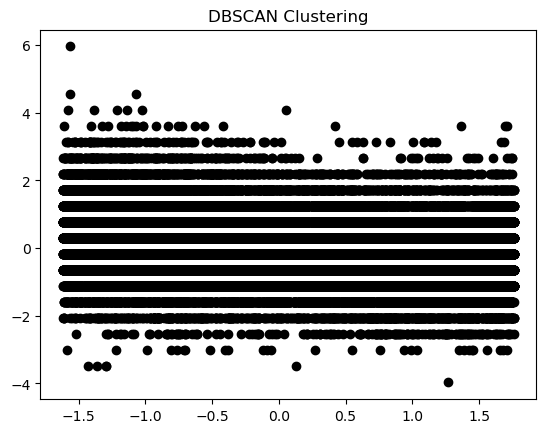

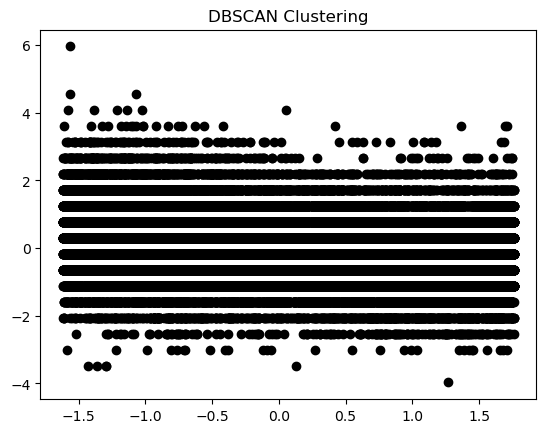

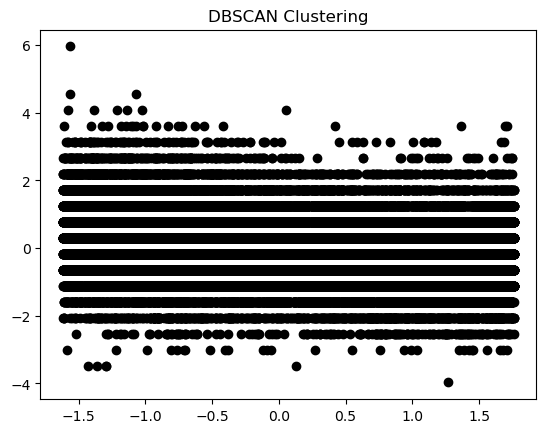

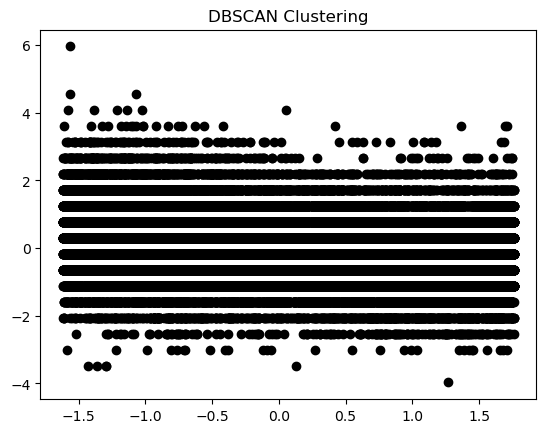

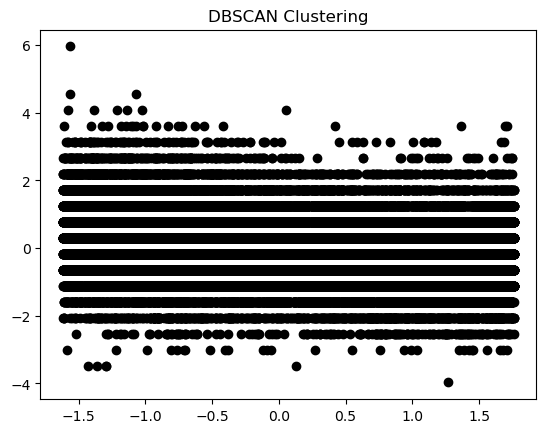

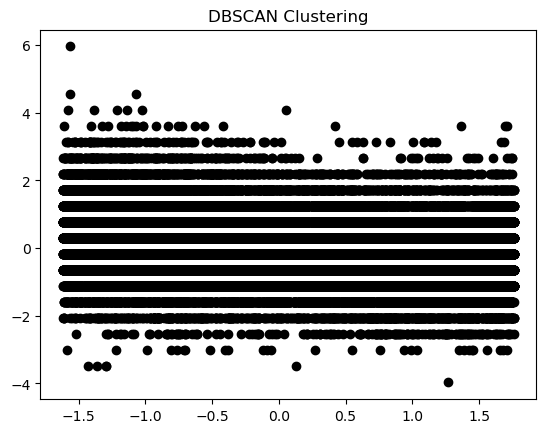

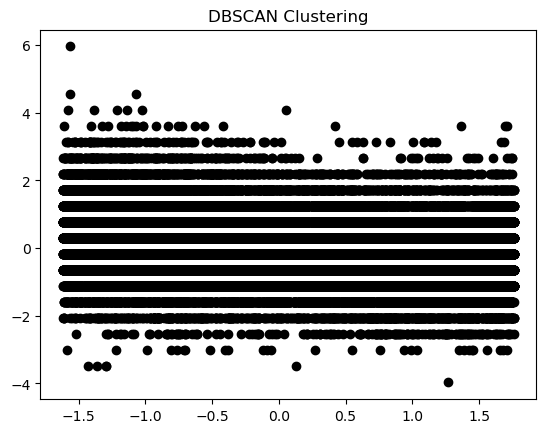

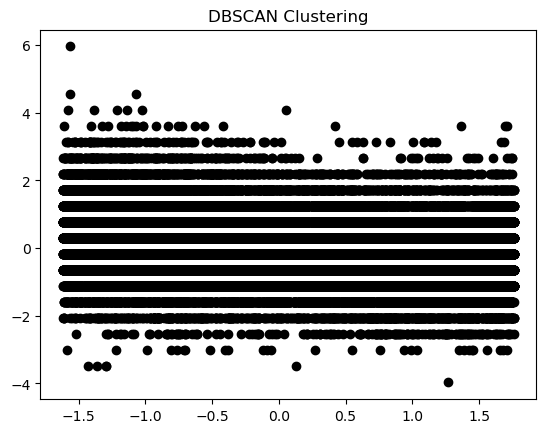

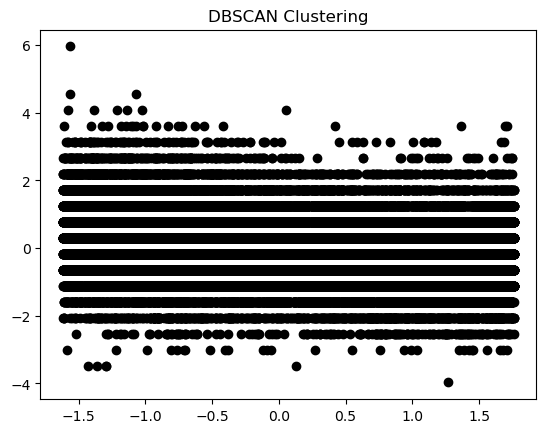

In [32]:
#31

# Perform DBSCAN clustering with different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df1_std)
        
        # Extract cluster labels and core sample indices
        cluster_labels = dbscan.labels_
        core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Plot the clusters
        unique_labels = set(cluster_labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (cluster_labels == k)

            xy = df1_std[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=14)

            xy = df1_std[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)

        plt.title('DBSCAN Clustering')
        plt.show()

    {UPDATE} WE NEED SOME SORT OF ANALYSIS OR COMMENT FOR THE DBSCAN PLOTS 

----
### Fuzzy C-Means Clustering

In [ ]:
# add #18
# FCM - hyperparmeter tuning / silhouette scoring 

# add hyper parameter tuning after figuring out n_clusters

# # Fuzzy C-Means Clustering - visualize, score it (there are other scoring methods too)

# # Number of clusters
n_clusters = 7

# # Fuzzy c-means algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df1_std.T, n_clusters, 2, error=0.005, maxiter=1000)

# # Assign each data point to the cluster with the highest membership value
cluster_membership = np.argmax(u, axis=0)

# # Plotting the results
fig, ax = plt.subplots()
for j in range(n_clusters):
    ax.scatter(df1_std[cluster_membership == j, 0], df1_std[cluster_membership == j, 1], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fuzzy C-Means Clustering')
plt.show()
plt.show()

    FCM and Kmeans in practice typically produce  very similar results.


In [ ]:
# add #19
# silhouette score bar chart for FCM 

In [33]:
#32

# # Plotting the results
# fig, ax = plt.subplots()
# for j in range(n_clusters):
#     ax.scatter(df1_std[cluster_membership == j, 0], df1_std[cluster_membership == j, 1], label=f'Cluster {j + 1}', marker='o')

# ax.legend()
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Fuzzy C-Means Clustering')
# plt.show()
# plt.show()

----
### Gaussian Mixture Model

In [34]:
#33
# add 21
# Gaussian Mixture Models (GMM) - visualize, score it (there are other scoring methods too)
gmm = GaussianMixture(n_components=7).fit(df1_std)

gmm.get_params() 

labels = gmm.predict(df1_std)
plt.scatter(df1_std[:, 0], df1_std[:, 1], c=labels, s=40, cmap='viridis');

probs = gmm.predict_proba(df1_std)
# print(probs[:5].round(3))

# obtain the center of each cluster
centers = gmm.means_
# print(centers)

# take centers and visualize them 
plt.figure(figsize=(8, 6))
plt.scatter(df1_std[:,0], df1_std[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers/centroids")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("GMM Clustering")
plt.show()

    {This may need to be changed}
    We are using a GMM model with 7 clusters as per our elbow method for the best guess. 

    Centroids or centers for the 7 clusters (n_components) in the GMM model is shown in red dots with the data points in blue. 


----
### OPTICS Clustering

In [35]:
#34
# add #25
# Plot OPTICS
# Fit the OPTICS model
clustering = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
clustering.fit(df1_std)

# Extract the clusters
labels = clustering.labels_

# Print the cluster labels
print("Cluster Labels:", labels)

print("Cluster memberships:\n{}".format(clustering.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=clustering.labels_)

# Calculate the number of clusters
num_clusters = len(np.unique(labels))
# Update the legend with the number of clusters
plt.legend(["cluster"] * num_clusters, loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('OPTICS Clustered Data')
plt.show()

#### Silhouette method for evalutation.

___
___
<a href="#top">Back to Top</a>
<a id="ModelEval4"></a>
## Modeling and Evaluation 4 (10 points total)
Summarize the Ramifications

----

___
___
<a href="#top">Back to Top</a>
<a id="Deployment"></a>
## Deployment (10 points total)
Be critical of your performance and tell the reader how you current model might be usable by other parties. 

----
Did you achieve your goals? If not, can you reign in the utility of your modeling?

    After evaluation of the ‘Online News Popularity’ dataset, it's evident that our goals were not achieved, primarily due to the complex nature of the dataset. The large dataset, with numerous features, resulted in overlapping clusters and a lack of meaningful insights. To address these challenges, a reduction in dataset features is necessary, with a particular emphasis on eliminating features that have no influence on the popularity of a news article. By focusing on relevant features, would potentially enhance the model's performance and provide more valuable insights from the data.

----
How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?

    The comprehensive nature of the model, with its multitude of features, poses challenges in clearly identifying distinct feature clusters within the data. To construct an efficient model for Mashable, it is imperative to discern and eliminate features that contribute to noise in the dataset. Streamlining the dataset with more pertinent features will enable the identification of meaningful trends that influence the popularity of news articles.

----
How would your deploy your model for interested parties?

    To facilitate accessibility and updates, our initial step involves selecting a platform such as Google Cloud. We will save our trained machine learning model using TensorFlow, ensuring seamless access and straightforward updates to the model.

----
What other data should be collected?

    It would be useful to have information about Mashable's target audience and the current makeup of the demographic of readers. Perhaps understanding the amount of additional engagement, such as commenting and liking articles on their website, could allow us to improve our modeling.

----
How often would the model need to be updated, etc.?

    It is crucial to consider updating the model on a quarterly basis, as the landscape of current events and life factors covered in the news is continually evolving. A static model may fail to accurately capture dynamic relationships in the data, potentially affecting the performance of algorithms designed to identify the popularity of news articles.
----

___
___
<a href="#top">Back to Top</a>
<a id="Exceptional"></a>
## Exceptional Work (10 points total)
You have free reign to provide additional analyses or combine analyses